# Main Program Testing
1. Inputs:
    * XMI Structure Model: .../Input/XMI/....xml]
    * BOM: .../Input/BOM/Catalogs.xlsx
2. Outputs:
    * Excel: .../Output/InstanceTables/InstanceTable[date_time].xlsx
    * Log: .../Output/Logs/Log[date_time].txt

READ STRUCTURE MODEL
   ['Block', 'SOI'] LV. 0  , gene = None , nId = L0_10000 , pId = None , xmiId = _18_5_2_bac02e1_1526287012216_691725_14095 , name = Electric Bicycle , value = None , formula = None
   None LV. 1  , gene = None , nId = L1_11000 , pId = L0_10000 , xmiId = _18_3_903028d_1448291312269_537593_13833 , name = MassRollUpPattern , value = None , formula = None
   ['ValueProperty'] LV. 2  , gene = None , nId = L2_12000 , pId = L1_11000 , xmiId = _18_3_903028d_1448291312293_396376_13891 , name = mass , value = None , formula = None
   ['ValueProperty'] LV. 2  , gene = None , nId = L2_13000 , pId = L1_11000 , xmiId = _18_3_903028d_1448291312293_412848_13892 , name = totalMass , value = None , formula = None
   ['ValueProperty', 'MOE'] LV. 3  , gene = None , nId = L3_13100 , pId = L2_13000 , xmiId = _18_5_2_bac02e1_1526367685993_432339_14859 , name = netMass , value = None , formula = None
   ['PartProperty', 'GAGene'] LV. 1  , gene = None , nId = L1_14100 , pId = L0_10000 , x

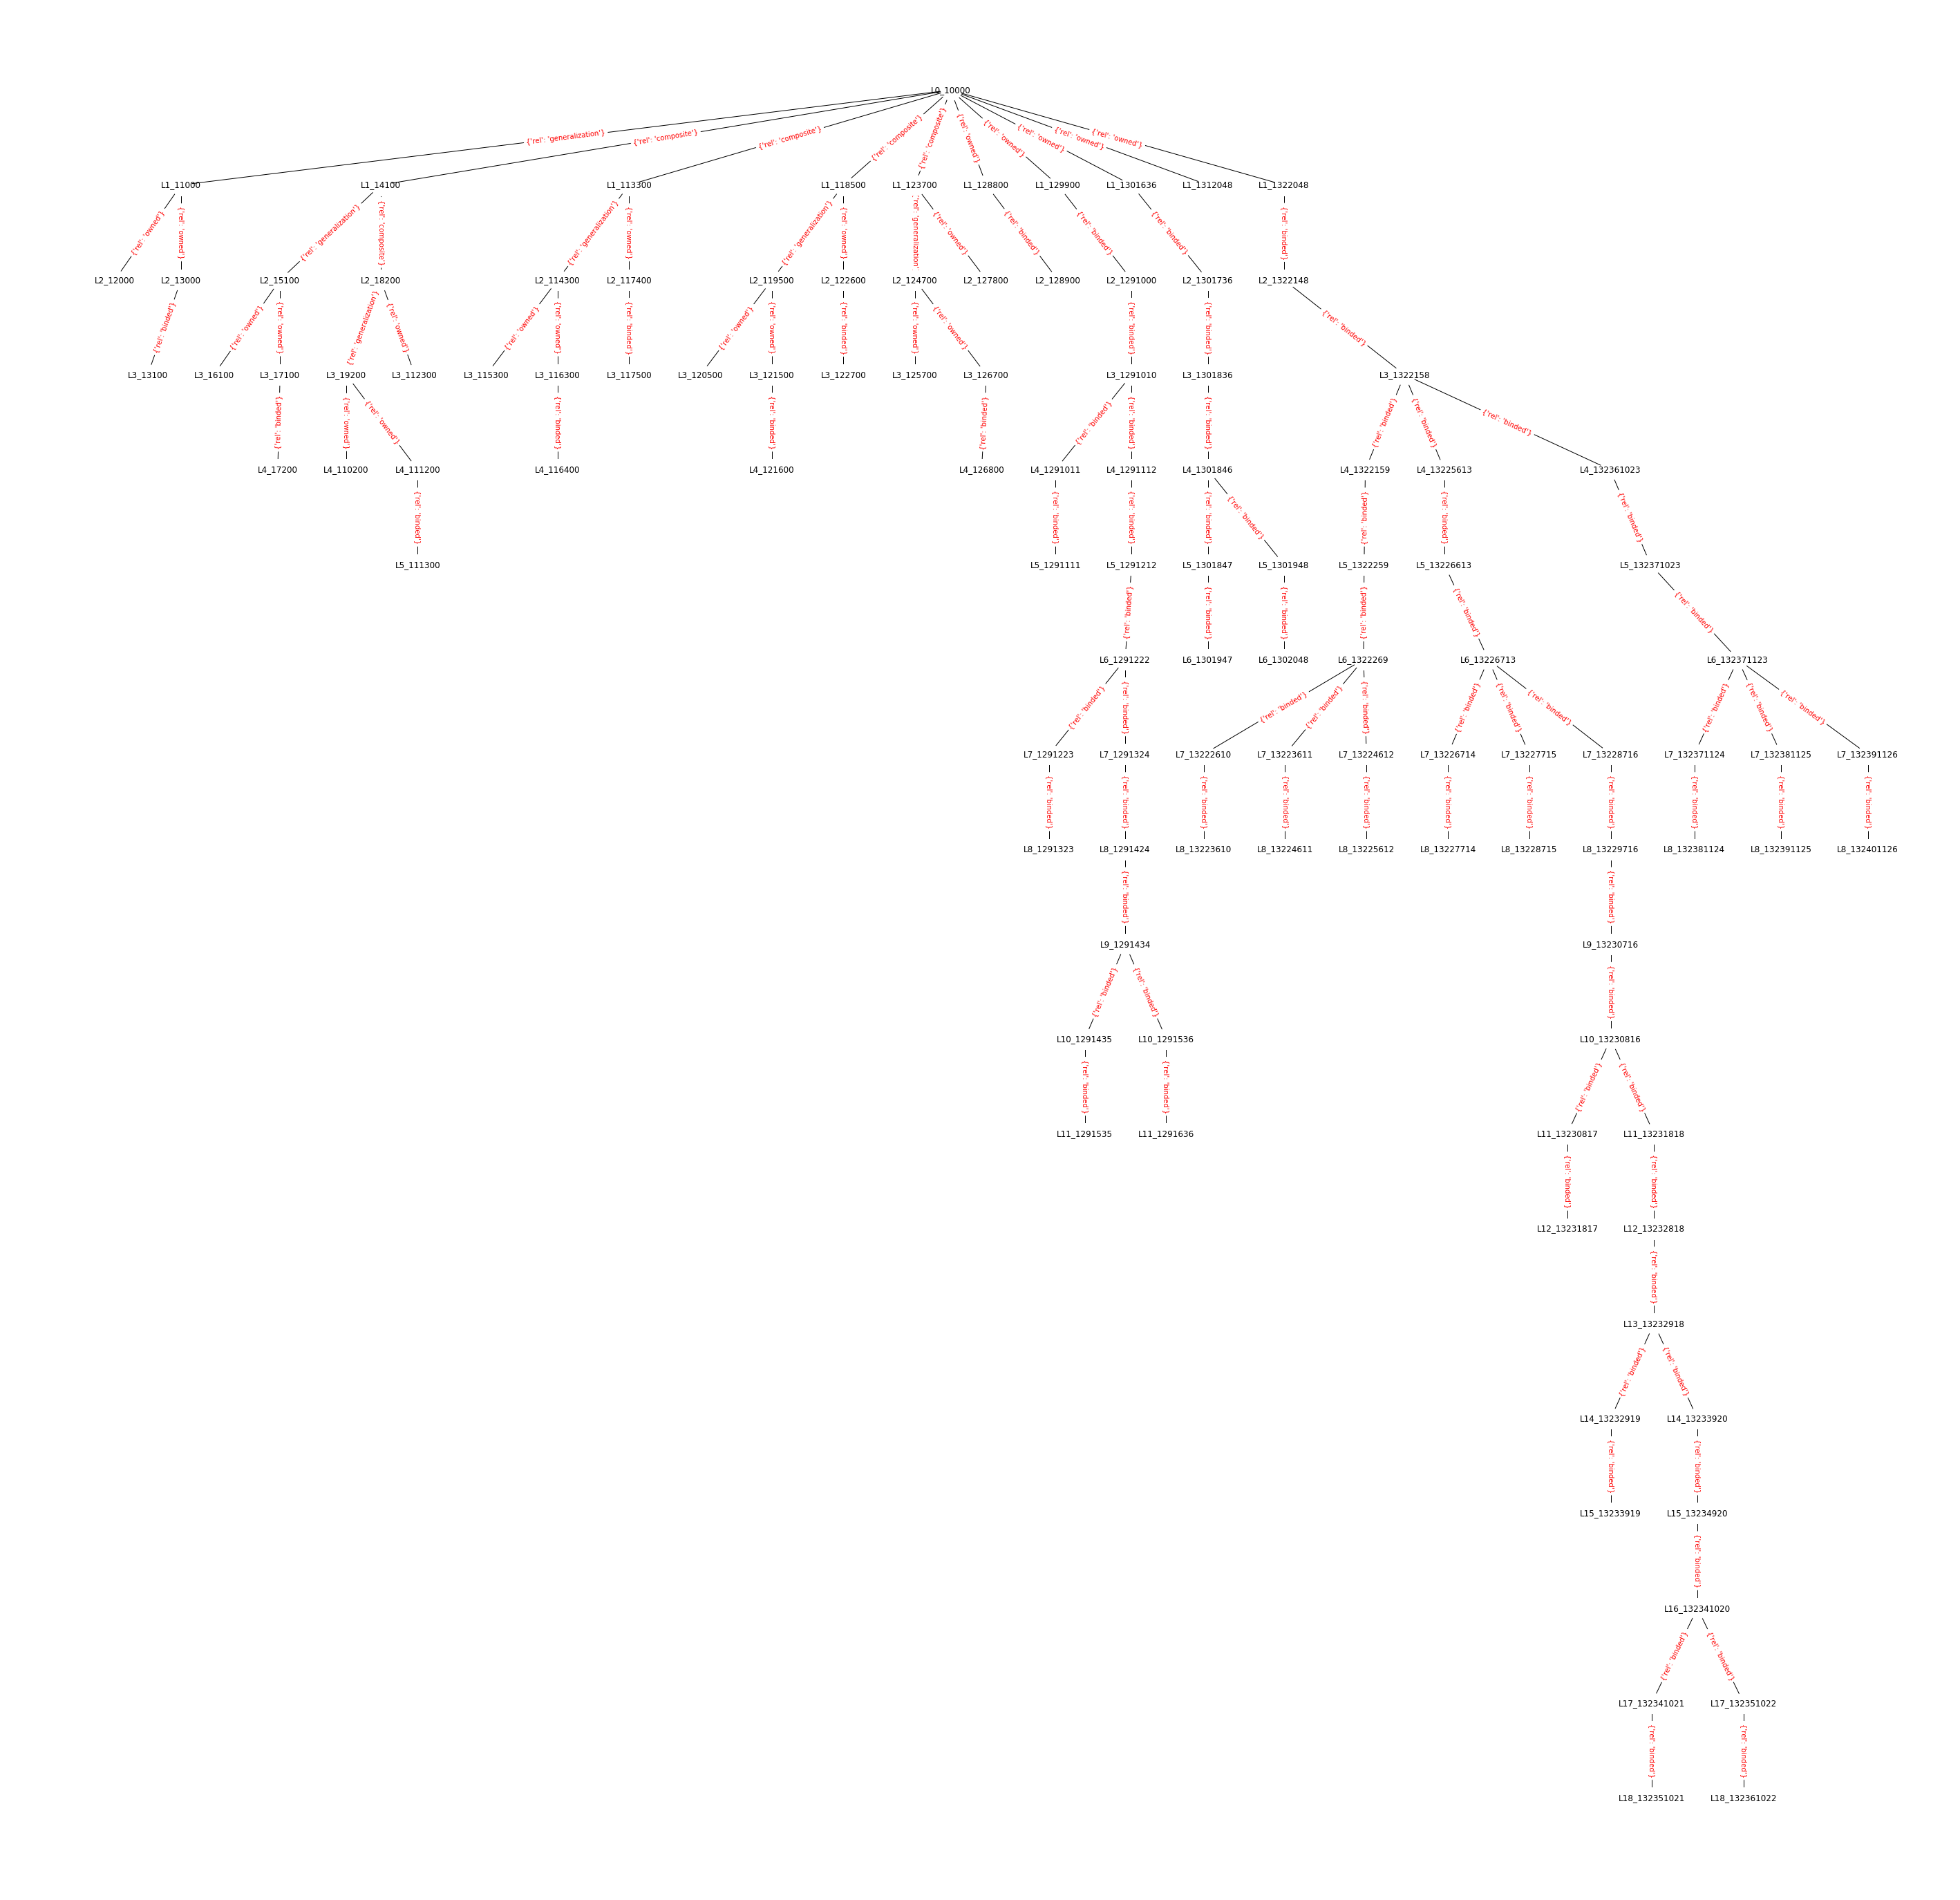

READ INSTANCES FROM CATALOG/BOM FILE
MaxRowSize: 7 MaxColSize: 3
Bicycle A {'name': 'typeA', 'mass': 6.27}
Bicycle B {'name': 'typeB', 'mass': 5.88}
Bicycle C {'name': 'typeC', 'mass': 9.2}
Bicycle D {'name': 'typeD', 'mass': 7.65}
Bicycle E {'name': 'typeE', 'mass': 12.9}
Bicycle F {'name': 'typeF', 'mass': 4.65}
Bicycle G {'name': 'typeG', 'mass': 10.2}
Controller A {'name': 'C1', 'mass': 2.0, 'amp': 3.0}
Controller B {'name': 'C2', 'mass': 4.5, 'amp': 4.0}
Controller C {'name': 'C3', 'mass': 5.4, 'amp': 10.0}
Controller D {'name': 'C4', 'mass': 3.7, 'amp': 6.0}
Controller E {'name': 'C5', 'mass': 2.6, 'amp': 9.0}
Motor A {'name': 'M1', 'mass': 3.5, 'outputWatt': 200.0}
Motor B {'name': 'M2', 'mass': 5.0, 'outputWatt': 250.0}
Motor C {'name': 'M3', 'mass': 4.0, 'outputWatt': 300.0}
Motor D {'name': 'M4', 'mass': 4.0, 'outputWatt': 350.0}
Motor E {'name': 'M5', 'mass': 2.7, 'outputWatt': 500.0}
Motor F {'name': 'M6', 'mass': 5.2, 'outputWatt': 750.0}
Power Source A {'name': 'batteryA'

D:\ToBeSaved\apps\others\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
D:\ToBeSaved\apps\others\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Evaluate chromosome: ['D', 'D', 'A', 'A', 'B']
Evaluate chromosome: ['B', 'D', 'A', 'C', 'E']
Evaluate chromosome: ['F', 'B', 'A', 'E', 'F']
Evaluate chromosome: ['B', 'B', 'A', 'E', 'F']
Evaluate chromosome: ['F', 'D', 'A', 'C', 'E']
Evaluate chromosome: ['B', 'D', 'B', 'A', 'E']
Evaluate chromosome: ['D', 'D', 'A', 'A', 'D']
Evaluate chromosome: ['A', 'D', 'C', 'C', 'B']
Evaluate chromosome: ['F', 'D', 'A', 'C', 'B']
Evaluate chromosome: ['A', 'D', 'C', 'C', 'E']
Evaluate chromosome: ['B', 'D', 'B', 'A', 'E']
Evaluate chromosome: ['A', 'D', 'C', 'C', 'E']
Evaluate chromosome: ['F', 'D', 'C', 'C', 'E']
Evaluate chromosome: ['A', 'C', 'A', 'B', 'D']
Evaluate chromosome: ['B', 'D', 'A', 'A', 'D']
Evaluate chromosome: ['D', 'D', 'B', 'E', 'A']
Evaluate chromosome: ['D', 'D', 'B', 'C', 'E']
Evaluate chromosome: ['F', 'D', 'C', 'E', 'A']
Evaluate chromosome: ['A', 'C', 'A', 'A', 'D']
Evaluate chromosome: ['B', 'D', 'A', 'B', 'D']
Evaluate chromosome: ['D', 'D', 'B', 'E', 'A']
Evaluate chro

In [2]:
#Author: Habibi Husain Arifin
#Created Date: 10 January 2019
#Last Updated Date: 23 February 2019
#Version: 1.0
#<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

import datetime as DT
import xml.etree.ElementTree as ET
import copy
import pandas as PD

from deap import base, creator, tools, algorithms

#Custom API
from API.StructureModel import XMI25Element, Colors, XPathHelper, GeneticAlgorithmHelper
from API.RNLTree import RNLTree
from API.ExcelManager import ExcelManager
from API.Instance import Instance
from API.GeneticAlgorithms import GeneticAlgorithms
from API.Configuration import Configuration

#Change this one later
MOE = "MOE"

#File path
SOI_NAME = "Electric Bicycle"
#INPUT_XMI_FILE_PATH = "Input/XMI/e-bicycle-190-sp0-v1.0-hbb.xml"
INPUT_XMI_FILE_PATH = "Input/XMI/e-bicycle-190-sp2-v1.0-hbb.xml"
INPUT_CATALOG_FILE_PATH = "Input/BOM/ElectricBicycle-Catalogs.xlsx"
OUTPUT_EXCEL_FILE_PATH = "Output/InstanceTables/ElectricBicycle-InstanceTable" + str(DT.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")) + ".xlsx" 
OUTPUT_LOG_FILE_PATH = "Output/Logs/ElectricBicycle-Log" + str(DT.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")) + ".txt"  

"""
#Test Read StructureModel
"""
print("READ STRUCTURE MODEL")
tree = ET.parse(INPUT_XMI_FILE_PATH)
root = tree.getroot()
structModel = XMI25Element.createNewStructureModel(SOI_NAME, root)

#Print to file
#file = open(OUTPUT_FILE_PATH,"w")
for obj in structModel:
    print(Colors.getFontColorByLevel(obj.level), Colors.BOLD, XPathHelper.getRepeatedChar("", obj.level), obj.stereotypes, "LV.", obj.level, Colors.ENDC, ", gene =", obj.gaGene, ", nId =", obj.nodeId, ", pId =", obj.parentNodeId, ", xmiId =", obj.xmiId, ", name =", obj.name, ", value =", obj.value, ", formula =", obj.formula )
    #file.write("")
print("\nNo. of element:", len(structModel), "DateTime:", str(DT.datetime.now()))

RNLTree.drawGraph(structModel)
    
"""
#Test Read Instance from ExcelFile
"""
print("READ INSTANCES FROM CATALOG/BOM FILE")

instances, maxRowSize, maxColSize = ExcelManager.readExcelFile(INPUT_CATALOG_FILE_PATH)
instances = Instance.generateGeneSequentially(instances, maxRowSize)
print("MaxRowSize:", maxRowSize, "MaxColSize:", maxColSize)
for instance in instances:
    print(instance.insType, instance.gaGene, instance.parameters)

"""
#Test Genetic Algorithm
"""
#GAParameters
IND_SIZE = GeneticAlgorithmHelper.getIndividualSize(structModel) #We need to get it from the StructureModel
SIZE_OF_GENE = Instance.getSizeOfGene(maxRowSize) #We need to get it from the BOM
NO_OF_BEST_SOLUTIONS = 5 #Get it from the User UI
NO_OF_GENERATIONS = 20 #Get it from the User UI
POPULATION_SIZE = 5 #Get it from the User UI

print("RUN GENETIC ALGORITHMS")
toolbox = base.Toolbox()

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("attr_alphabet", GeneticAlgorithms.generateGeneRandomly, k=SIZE_OF_GENE)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_alphabet, n=IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", GeneticAlgorithms.evaluation, structureModel=structModel, instances=instances)

#Executes a one point crossover on the input sequence individuals.
#The two individuals are modified in place.
#The resulting individuals will respectively have the length of the other.
toolbox.register("mate", tools.cxOnePoint)

#Shuffle the attributes of the input individual and return the mutant.
#The individual is expected to be a sequence.
#The indpb argument is the probability of each attribute to be moved.
#Usually this mutation is applied on vector of indices.
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)

#Flip the value of the attributes of the input individual and return the mutant.
#The individual is expected to be a sequence and the values of the attributes shall stay valid after the not operator is called on them.
#The indpb argument is the probability of each attribute to be flipped.
#This mutation is usually applied on boolean individuals.
#toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)

#This function applies a gaussian mutation of mean mu and standard deviation sigma on the input individual.
#This mutation expects a sequence individual composed of real valued attributes.
#The indpb argument is the probability of each attribute to be mutated.
#toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)

toolbox.register("select", tools.selBest)

#Tool decoration is a very powerful feature that helps to control very precise things during an evolution
#without changing anything in the algorithm or operators.
chromosomeSeq = XMI25Element.getChromosomeSequence(structModel)
toolbox.decorate("mate", GeneticAlgorithms.checkExistence(chromosomeSeq, instances))
toolbox.decorate("mutate", GeneticAlgorithms.checkExistence(chromosomeSeq, instances))

pop = GeneticAlgorithms.customEvolution(POPULATION_SIZE, NO_OF_GENERATIONS, toolbox)
bests = tools.selBest(pop, k=NO_OF_BEST_SOLUTIONS)

#Print to file
file = open(OUTPUT_LOG_FILE_PATH,"w")
print("\n############################################################")
print("\n", chromosomeSeq, "\nSolution\tFitness")
file.write(":".join(chromosomeSeq) + "\nSolution\tFitness\n")
listChromosome = []
listFitness = []
listMOEs = []

for best in bests:
    print("\n", best, best.fitness)
    file.write("".join(best) + "\t" + str(best.fitness) + "\n")
    listChromosome.append("".join(best))
    listFitness.append(str(best.fitness))
    
    #Create configuration for Solution(s)
    sm = copy.deepcopy(structModel)
    bestConf = Configuration.createNewConfiguration(sm, best, instances) #createNewConfiguration(structureModel, chromosome, instances)
    moes = XMI25Element.getElementsByStereotype(bestConf.structureModel, MOE)
    dictMOE = {}
    for moe in moes:
        print(moe.name, ":", moe.value, moe.unitOnValueType)
        file.write(str(moe.name) + ":" + str(moe.value) + " " + str(moe.unitOnValueType) + "\n")
        dictMOE[str(moe.name) + "::" + str(moe.unitOnValueType)] = str(moe.value)
    listMOEs.append(dictMOE)
    dictMOE = {}
file.close()

#Write to excel
dicts = {}
dicts["Chromosome" + "[" + ",".join(chromosomeSeq) + "]"] = listChromosome
dicts["Fitness Value"] = listFitness
for listMOE in listMOEs:
    for key in listMOE.keys():
        if key not in dicts:dicts[key] = []
        dicts[key].append(listMOE[key])
df = PD.DataFrame(dicts)
ExcelManager.writeExcelFile(OUTPUT_EXCEL_FILE_PATH, df)